In [ ]:
# Clone github repo containing the data as csv file
! rm -rf covid_data
! git clone https://github.com/PatrickNiccolai2/covid_data

Cloning into 'covid_data'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [ ]:
# Read the data into a pandas dataframe
full_df = pd.read_csv("/content/covid_data/owid-covid-data.csv")

In [ ]:
# See what the data looks like
print(full_df.head(10))
print("Number of rows = " + str(full_df.shape[0]))
print("Number of columns = " + str(full_df.shape[1]))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
5      AFG      Asia  Afghanistan  2020-02-29          5.0        0.0   
6      AFG      Asia  Afghanistan  2020-03-01          5.0        0.0   
7      AFG      Asia  Afghanistan  2020-03-02          5.0        0.0   
8      AFG      Asia  Afghanistan  2020-03-03          5.0        0.0   
9      AFG      Asia  Afghanistan  2020-03-04          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN       

In [ ]:
for col in full_df.columns:
    print(col)

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
new_people_vaccinated_smoothed
new_people_vaccinated_smoothed_per_hundre

In [ ]:
# Create an array with each location
locations_arr = pd.unique(full_df["location"])
num_locations = len(locations_arr)
print("Number of locations = " + str(num_locations))

Number of locations = 244


In [ ]:
# Funtion to convert date string into datetime object
def str_to_datetime(in_str):
  out_datetime = datetime.strptime(in_str,"%Y-%m-%d")
  return out_datetime

# Apply that function to the column with the date string
full_df["datetime"] = full_df["date"].apply(str_to_datetime)

In [ ]:
# When is the data first and last gathered
first_data_date = min(full_df["datetime"])
last_data_date = max(full_df["datetime"])
print("First data is from " + str(first_data_date))
print("Last data is from " + str(last_data_date))

First data is from 2020-01-01 00:00:00
Last data is from 2022-09-27 00:00:00


In [ ]:
# For each location, get the first and last date recorded
date_range_per_location = []
for location in locations_arr:
  loc_df = full_df.loc[full_df["location"] == location]
  loc_first_data_date = min(loc_df["datetime"])
  loc_last_data_date = max(loc_df["datetime"])
  date_range_per_location.append([loc_first_data_date, loc_last_data_date])

In [ ]:
print(date_range_per_location)

[[Timestamp('2020-02-24 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-02-13 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-02-25 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-02-25 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-03-02 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-03-20 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-03-28 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-03-13 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-01-01 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-02-03 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-03-13 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-01-22 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-01-26 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-02-25 00:00:00'), Timestamp('2022-09-27 00:00:00')], [Timestamp('2020-03

In [ ]:
# Get the difference from the first and last date for each location
date_difference_per_location = []
for date_range in date_range_per_location:
  date_difference = date_range[1] - date_range[0]
  date_difference_per_location.append(date_difference)

num_days_per_location = []
for date_difference in date_difference_per_location:
  num_days = date_difference.days
  num_days_per_location.append(num_days)

print(num_days_per_location)

[946, 957, 945, 945, 939, 921, 913, 928, 1000, 967, 928, 979, 975, 945, 940, 925, 946, 933, 924, 942, 966, 918, 925, 922, 935, 930, 908, 936, 911, 944, 913, 932, 933, 931, 910, 974, 935, 978, 921, 928, 926, 922, 947, 979, 935, 880, 926, 494, 935, 930, 945, 929, 927, 933, 940, 930, 968, 923, 919, 940, 940, 956, 922, 926, 920, 995, 927, 928, 978, 978, 937, 906, 971, 972, 977, 928, 927, 924, 944, 974, 927, 937, 995, 925, 919, 828, 953, 534, 928, 916, 929, 921, 979, 930, 978, 938, 942, 971, 939, 963, 951, 946, 941, 921, 950, 970, 930, 979, 553, 938, 928, 935, 497, 927, 946, 923, 917, 995, 949, 867, 924, 937, 937, 922, 947, 979, 946, 979, 921, 912, 977, 933, 916, 936, 873, 927, 923, 1000, 614, 933, 941, 931, 924, 923, 963, 919, 914, 927, 537, 976, 943, 922, 942, 922, 921, 942, 407, 979, 908, 944, 316, 609, 958, 976, 946, 945, 401, 936, 932, 921, 934, 935, 971, 440, 937, 940, 839, 941, 944, 970, 927, 750, 916, 927, 905, 927, 678, 941, 904, 939, 942, 944, 926, 910, 978, 497, 935, 968, 715, 92

In [ ]:
# Get stats about the number of days per location
num_days_df = pd.DataFrame(num_days_per_location)
num_days_df["location"] = locations_arr
mean_num_days = num_days_df[0].mean()
median_num_days = num_days_df[0].median()
max_num_days = num_days_df[0].max()
min_num_days = num_days_df[0].min()
print("Mean number of days = " + str(mean_num_days))
print("Median number of days = " + str(median_num_days))
print("Max number of days = " + str(max_num_days))
print("Min number of days = " + str(min_num_days))

Mean number of days = 899.9016393442623
Median number of days = 932.0
Max number of days = 1000
Min number of days = 0


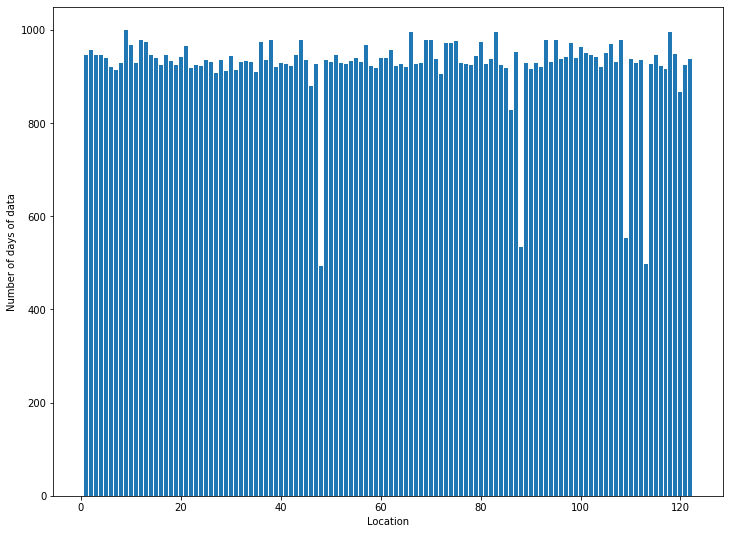

In [ ]:
# Plot the number of days, only plotting half here to make the bars more visible
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Location")
plt.ylabel("Number of days of data")
#ax.set_xticklabels(locations_arr[0:122])
plt.bar([i for i in range(1,123)], num_days_per_location[0:122])
plt.show()

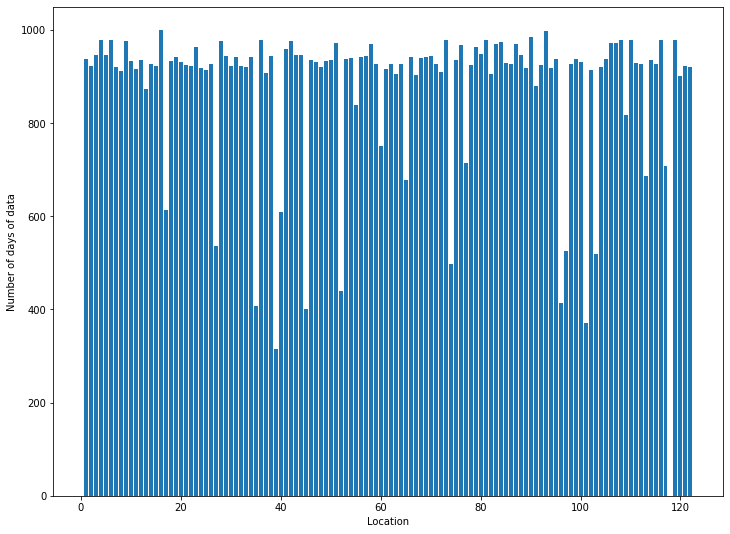

In [ ]:
# Plot the other half
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Location")
plt.ylabel("Number of days of data")
#ax.set_xticklabels(locations_arr[122:244])
plt.bar([i for i in range(1,123)], num_days_per_location[122:244])
plt.show()

Here we can see that most locations have 900 to 1000 days of data. Below we'll print out what locations have less than 700, to see if there is a pattern in what locations have less data

In [ ]:
under_700 = num_days_df.loc[num_days_df[0] < 700]
print(under_700)

       0                   location
47   494               Cook Islands
87   534                   Guernsey
108  553                     Jersey
112  497                   Kiribati
138  614       Micronesia (country)
148  537                      Nauru
156  407                       Niue
160  316            Northern Cyprus
161  609   Northern Mariana Islands
166  401                      Palau
173  440                   Pitcairn
186  678                      Samoa
195  497  Sint Maarten (Dutch part)
217  413                    Tokelau
218  525                      Tonga
222  371               Turkmenistan
224  518                     Tuvalu
234  686                    Vanuatu
239    0             Western Sahara


In [ ]:
# Get the difference between samples for each
for location in locations_arr:
  full_df.loc[full_df["location"] == location, "datetime_diff"] = full_df.loc[full_df["location"] == location]["datetime"].diff()

In [ ]:
print(full_df["datetime_diff"].head(10))

0      NaT
1   1 days
2   1 days
3   1 days
4   1 days
5   1 days
6   1 days
7   1 days
8   1 days
9   1 days
Name: datetime_diff, dtype: timedelta64[ns]


In [ ]:
# Get mean, median, and mode sample difference
mean_sample_rate = full_df["datetime_diff"].mean()
median_sample_rate = full_df["datetime_diff"].median()
mode_sample_rate = full_df["datetime_diff"].mode().squeeze()
print(mean_sample_rate)
print(median_sample_rate)
print(mode_sample_rate)

1 days 00:01:12.067932887
1 days 00:00:00
1 days 00:00:00


We can see that the data is collected every day

In [ ]:
# Get number of times we go more than one day without sampling
td = timedelta(days=1)
missing_samples = full_df[full_df["datetime_diff"] != td].shape[0]
missing_samples -= len(locations_arr) # Account for NaTs at beginning of each location
print(missing_samples)

10


In [ ]:
# Create a dataframe with only Afghanistan's data
afg_df = full_df.loc[full_df["location"] == "Afghanistan"]

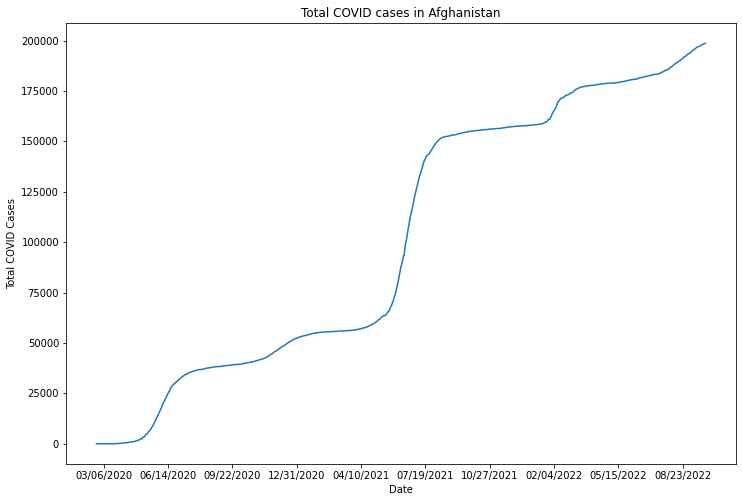

In [ ]:
# Plot total cases in Afghanistan
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Total COVID Cases")
plt.xticks(afg_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("Total COVID cases in Afghanistan")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(afg_df["datetime"],afg_df["total_cases"])
plt.show()

In [ ]:
# Create dataframe with only US data
usa_df = full_df.loc[full_df["location"] == "United States"]


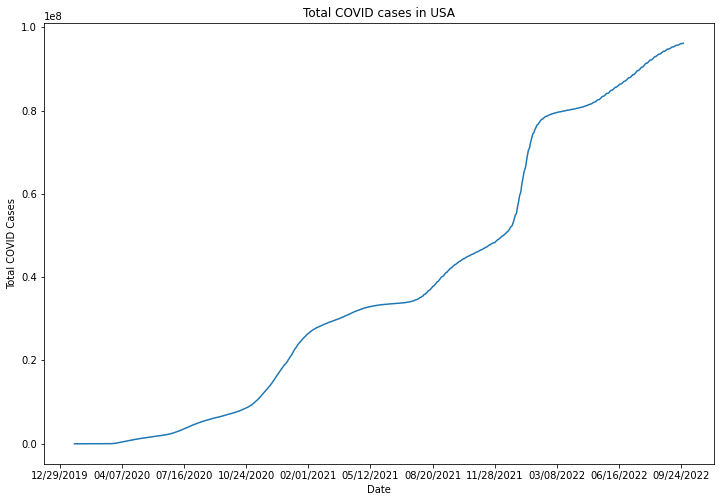

In [ ]:
# Plot total cases in US
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Total COVID Cases")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("Total COVID cases in USA")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["total_cases"])
plt.show()

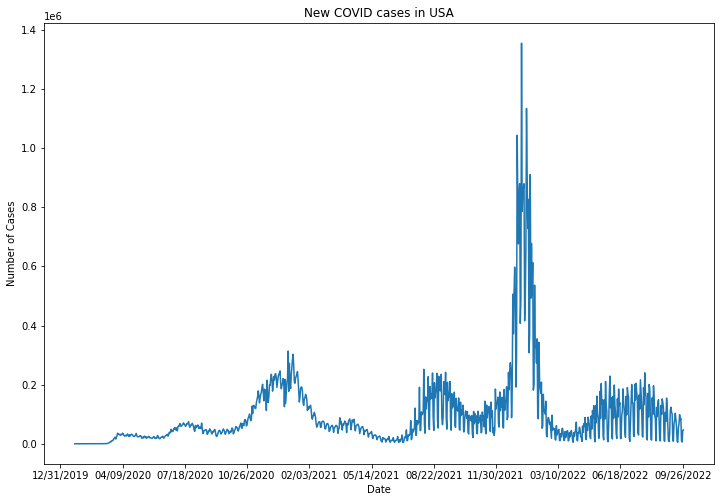

In [ ]:
# Plot new cases
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New COVID cases in USA")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["new_cases"])
plt.show()

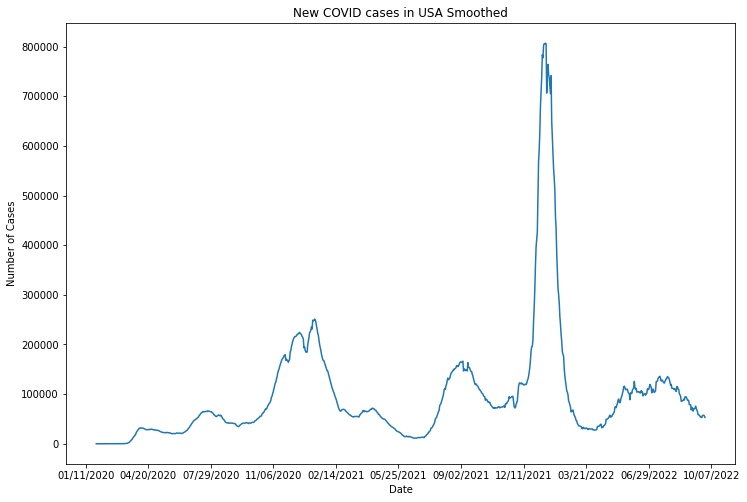

In [ ]:
# Plot new cases smoothed
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New COVID cases in USA Smoothed")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["new_cases_smoothed"])
plt.show()

The smoothed graph looks much nicer. We still need to look into how the smoothing is done

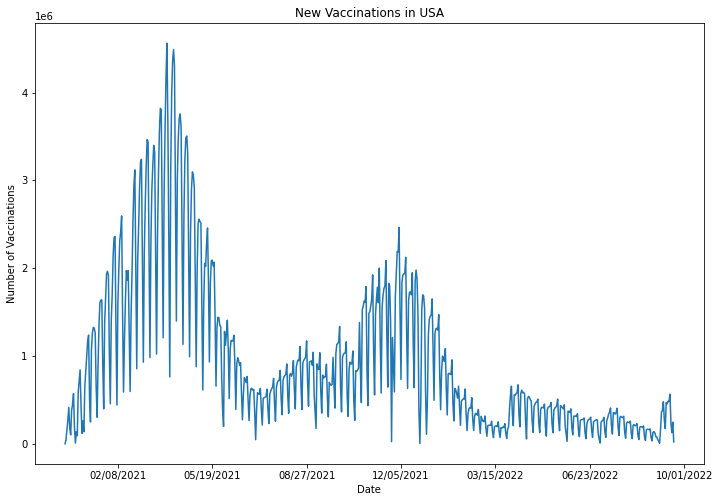

In [ ]:
# Plot new vaccinations
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of Vaccinations")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New Vaccinations in USA")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["new_vaccinations"])
plt.show()

I wonder why it oscillates so much? Maybe people get vaccinated less on the weekend?

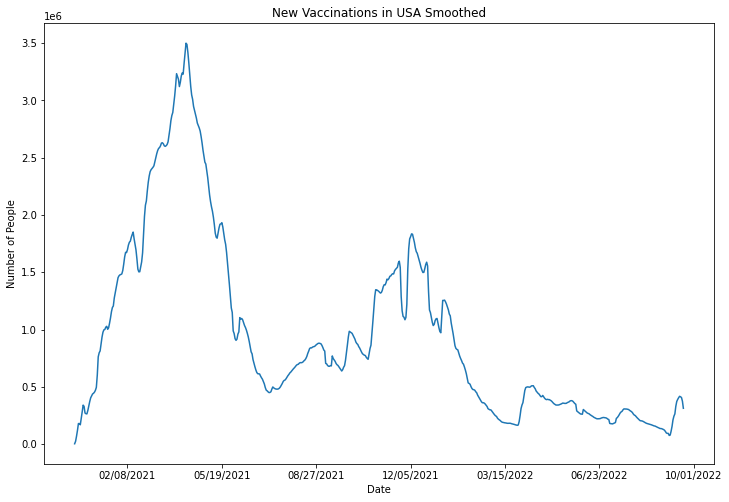

In [ ]:
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New Vaccinations in USA Smoothed")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["new_vaccinations_smoothed"])
plt.show()

Its interesting how steeply the number of new vaccinations drops off after the initial peak.

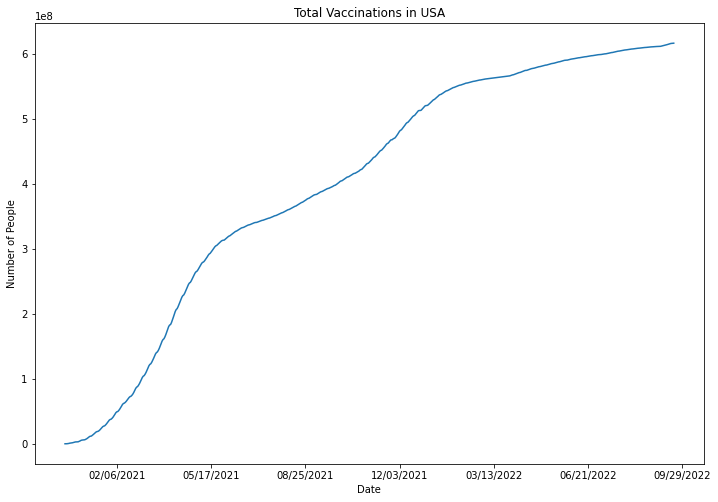

In [ ]:
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("Total Vaccinations in USA")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["total_vaccinations"])
plt.show()

The rate of people getting vaccinated is slowing down

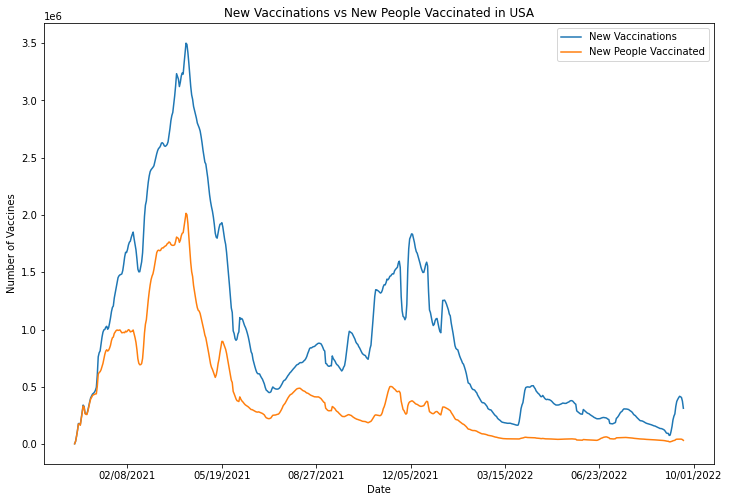

In [ ]:
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of Vaccines")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New Vaccinations vs New People Vaccinated in USA")
#ax.set_xticklabels(afg_df["datetime"])
plt.plot(usa_df["datetime"],usa_df["new_vaccinations_smoothed"])
plt.plot(usa_df["datetime"],usa_df["new_people_vaccinated_smoothed"])
plt.legend(["New Vaccinations", "New People Vaccinated"])
plt.show()

Its interesting how when the booster came out, there was in increase in people who hadn't been previously vaccinated getting vaccinated for the first time. I think people talking about the booster got people who were previously opposed to the vaccine to get it.

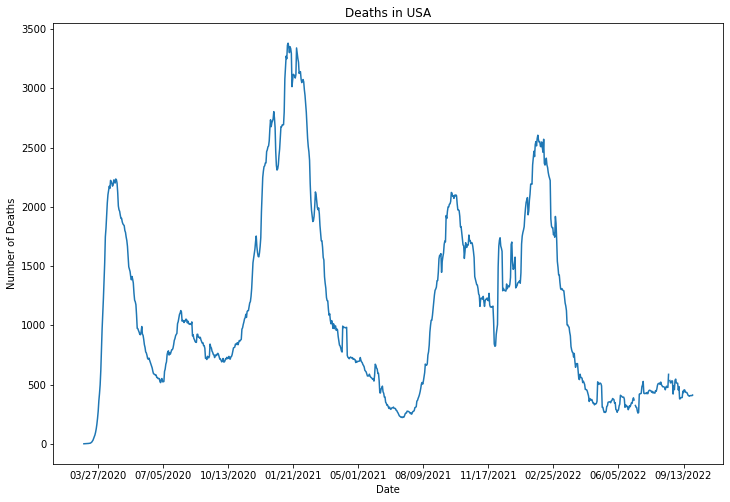

In [ ]:
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("Deaths in USA")
#ax.set_xticklabels(afg_df["datetime"])
#plt.plot(usa_df["datetime"],usa_df["new_people_vaccinated_smoothed"])
plt.plot(usa_df["datetime"],usa_df["new_deaths_smoothed"])
#plt.legend(["New People Vaccinated", "New Deaths"])
plt.show()

Deaths seem to increase in the winter.

In [ ]:
# Get max data for locations, rather than time series data
total_vaccs_per_location = []
people_fully_vacced_per_location = []
total_vaccs_per_100_per_location = []
people_fully_vacced_per_100_per_location = []
total_deaths_per_location = []
total_deaths_per_mill_per_location = []
for location in locations_arr:
  loc_df = full_df.loc[full_df["location"] == location]
  total_vaccs = loc_df["total_vaccinations"].max()
  people_fully_vacced = loc_df["people_fully_vaccinated"].max()
  total_vaccs_per_100 = loc_df["total_vaccinations_per_hundred"].max()
  people_fully_vacced_per_100 = loc_df["people_fully_vaccinated_per_hundred"].max()
  total_deaths = loc_df["total_deaths"].max()
  total_deaths_per_mill = loc_df["total_deaths_per_million"].max()
  total_vaccs_per_location.append(total_vaccs)
  people_fully_vacced_per_location.append(people_fully_vacced)
  total_vaccs_per_100_per_location.append(total_vaccs_per_100)
  people_fully_vacced_per_100_per_location.append(people_fully_vacced_per_100)
  total_deaths_per_location.append(total_deaths)
  total_deaths_per_mill_per_location.append(total_deaths_per_mill)


In [ ]:
# Create a new data set, with one row for each location and the max data we have for that location
vaccs_by_loc_df = pd.DataFrame()
vaccs_by_loc_df["locations"] = locations_arr
vaccs_by_loc_df["total_vaccinations"] = total_vaccs_per_location
vaccs_by_loc_df["people_fully_vaccinated"] = people_fully_vacced_per_location
vaccs_by_loc_df["total_vaccinations_per_100"] = total_vaccs_per_100_per_location
vaccs_by_loc_df["people_fully_vaccinated_per_100"] = people_fully_vacced_per_100_per_location
vaccs_by_loc_df["total_deaths"] = total_deaths_per_location
vaccs_by_loc_df["total_deaths_per_mill"] = total_deaths_per_mill_per_location
vaccs_by_loc_df = vaccs_by_loc_df.set_index("locations")

print(vaccs_by_loc_df)

                total_vaccinations  people_fully_vaccinated  \
locations                                                     
Afghanistan           1.186900e+07             1.023328e+07   
Africa                6.409275e+08             3.187035e+08   
Albania               2.966256e+06             1.261243e+06   
Algeria               1.526744e+07             6.481186e+06   
Andorra               1.541950e+05             5.347800e+04   
...                            ...                      ...   
Western Sahara                 NaN                      NaN   
World                 1.272270e+10             4.948057e+09   
Yemen                 8.982570e+05             4.704910e+05   
Zambia                9.202035e+06             5.926723e+06   
Zimbabwe              1.216160e+07             4.730503e+06   

                total_vaccinations_per_100  people_fully_vaccinated_per_100  \
locations                                                                     
Afghanistan           

In [ ]:
# Remove the locations that aren't countries, so we can compare countries 
vaccs_by_country_df = vaccs_by_loc_df.drop(index="World")
vaccs_by_country_df = vaccs_by_country_df.drop(index="Asia")
vaccs_by_country_df = vaccs_by_country_df.drop(index="Upper middle income")
vaccs_by_country_df = vaccs_by_country_df.drop(index="Lower middle income")
vaccs_by_country_df = vaccs_by_country_df.drop(index="High income")
vaccs_by_country_df = vaccs_by_country_df.drop(index="Europe")
vaccs_by_country_df = vaccs_by_country_df.drop(index="North America")
vaccs_by_country_df = vaccs_by_country_df.drop(index="South America")
vaccs_by_country_df = vaccs_by_country_df.drop(index="European Union")
vaccs_by_country_df = vaccs_by_country_df.drop(index="Africa")
vaccs_by_country_df = vaccs_by_country_df.drop(index="Low income")

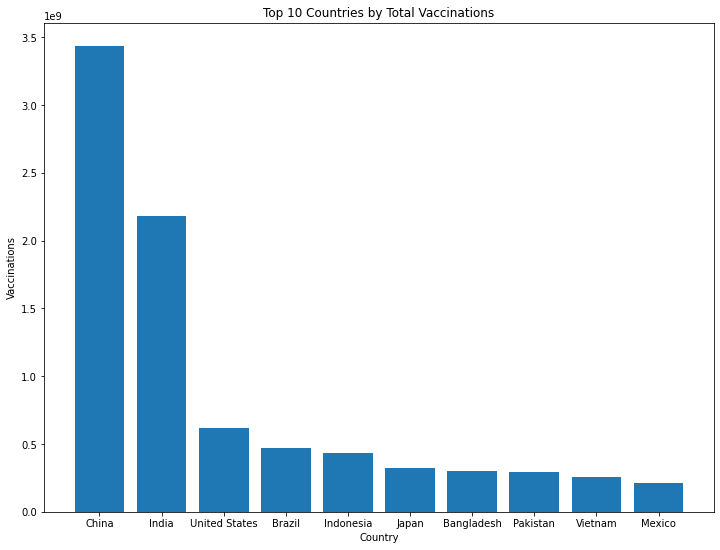

In [ ]:
# Sort by total vaccinations
vaccs_by_country_df = vaccs_by_country_df.sort_values(by=["total_vaccinations"], ascending=False)

# Plot top 10 countries by total vaccinations
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Country")
plt.ylabel("Vaccinations")
plt.xticks([i for i in range(1,11)])
ax.set_xticklabels(vaccs_by_country_df.index[0:10])
plt.bar([i for i in range(1,11)], vaccs_by_country_df["total_vaccinations"].iloc[0:10])
plt.title("Top 10 Countries by Total Vaccinations")
plt.show()

Countries with larger population have more vaccinations as expected.

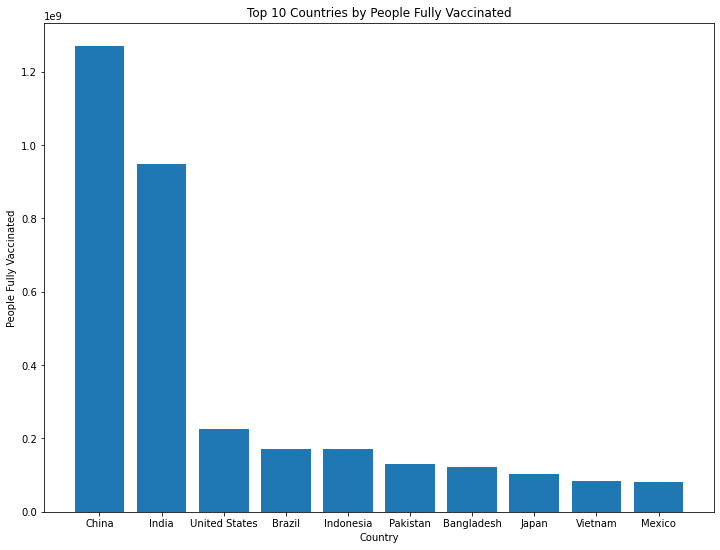

In [ ]:
# Sort by people fully vaccinated
vaccs_by_country_df = vaccs_by_country_df.sort_values(by=["people_fully_vaccinated"], ascending=False)

# Plot top 10
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Country")
plt.ylabel("People Fully Vaccinated")
plt.xticks([i for i in range(1,11)])
ax.set_xticklabels(vaccs_by_country_df.index[0:10])
plt.bar([i for i in range(1,11)], vaccs_by_country_df["people_fully_vaccinated"].iloc[0:10])
plt.title("Top 10 Countries by People Fully Vaccinated")
plt.show()

Looks similar to toal vaccinations, as expected

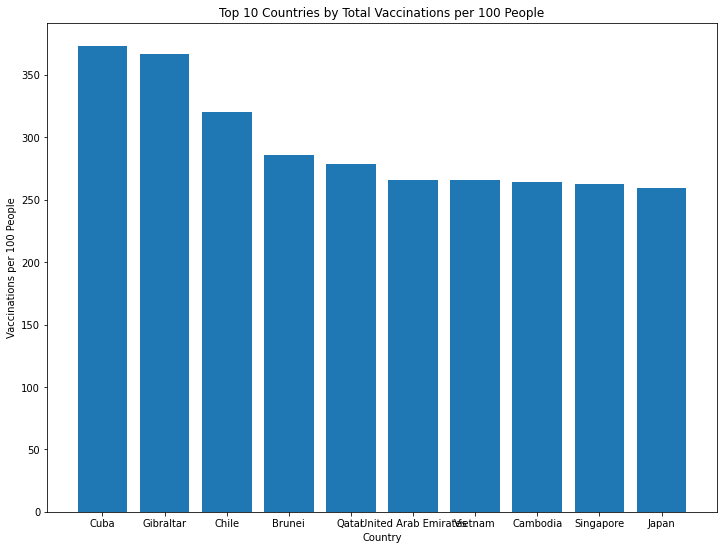

In [ ]:
vaccs_by_country_df = vaccs_by_country_df.sort_values(by=["total_vaccinations_per_100"], ascending=False)


fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Country")
plt.ylabel("Vaccinations per 100 People")
plt.xticks([i for i in range(1,11)])
ax.set_xticklabels(vaccs_by_country_df.index[0:10])
plt.bar([i for i in range(1,11)], vaccs_by_country_df["total_vaccinations_per_100"].iloc[0:10])
plt.title("Top 10 Countries by Total Vaccinations per 100 People")
plt.show()

This plots vaccinations per capita. I was surprised by the top countries.

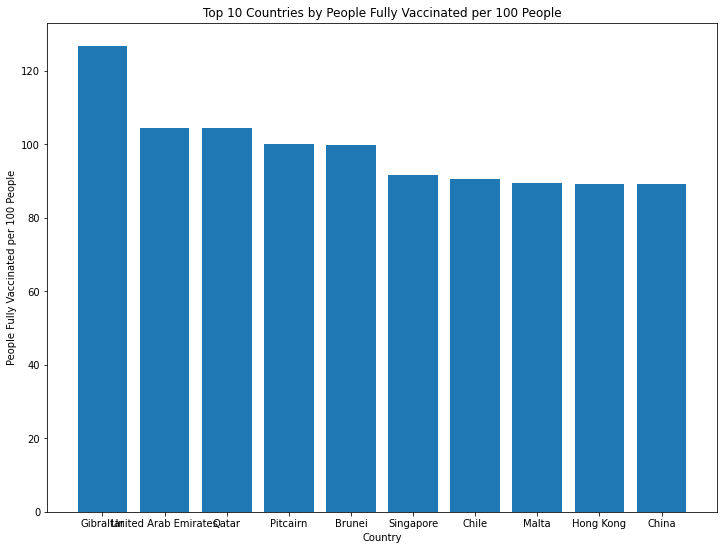

In [ ]:
vaccs_by_country_df = vaccs_by_country_df.sort_values(by=["people_fully_vaccinated_per_100"], ascending=False)

#print(vaccs_by_country_df.head(10))

fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Country")
plt.ylabel("People Fully Vaccinated per 100 People")
plt.xticks([i for i in range(1,11)])
ax.set_xticklabels(vaccs_by_country_df.index[0:10])
plt.bar([i for i in range(1,11)], vaccs_by_country_df["people_fully_vaccinated_per_100"].iloc[0:10])
plt.title("Top 10 Countries by People Fully Vaccinated per 100 People")
plt.show()

This plot shows people fully vaccinated per capita. Looks fairly similar to above plot.

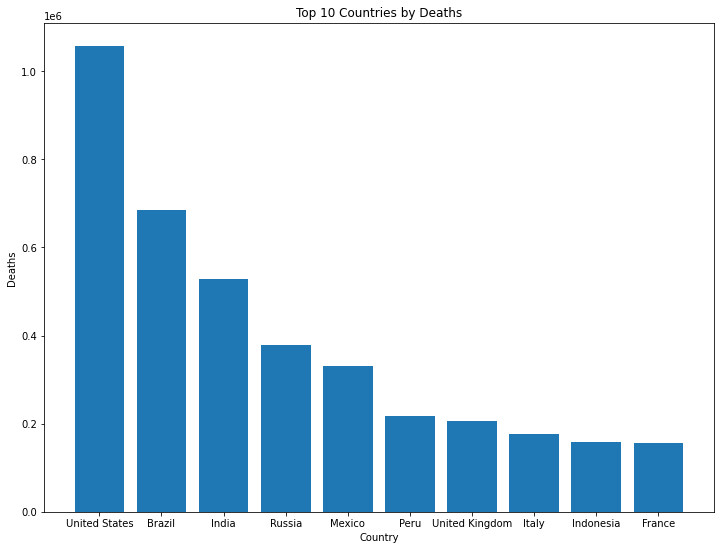

In [ ]:
vaccs_by_country_df = vaccs_by_country_df.sort_values(by=["total_deaths"], ascending=False)

#print(vaccs_by_country_df.head(10))

fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Country")
plt.ylabel("Deaths")
plt.xticks([i for i in range(1,11)])
ax.set_xticklabels(vaccs_by_country_df.index[0:10])
plt.bar([i for i in range(1,11)], vaccs_by_country_df["total_deaths"].iloc[0:10])
plt.title("Top 10 Countries by Deaths")
plt.show()

Interestingly, the countries with the most deaths are not just the countries with the highest population. The U.S. leads in number of deaths by a large margin.

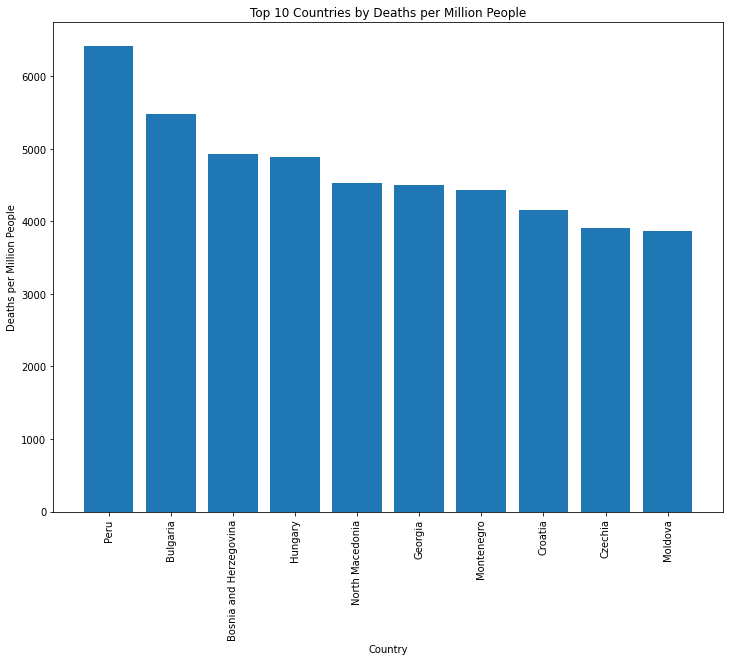

In [ ]:
vaccs_by_country_df = vaccs_by_country_df.sort_values(by=["total_deaths_per_mill"], ascending=False)

#print(vaccs_by_country_df.head(10))

fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Country")
plt.ylabel("Deaths per Million People")
plt.xticks([i for i in range(1,11)])
plt.xticks(rotation=90)
ax.set_xticklabels(vaccs_by_country_df.index[0:10])
plt.bar([i for i in range(1,11)], vaccs_by_country_df["total_deaths_per_mill"].iloc[0:10])
plt.title("Top 10 Countries by Deaths per Million People")
plt.show()

Deaths per capita looks different from total deaths. I wonder which plot is more useful

In [ ]:
china_df = full_df.loc[full_df["location"] == "China"]

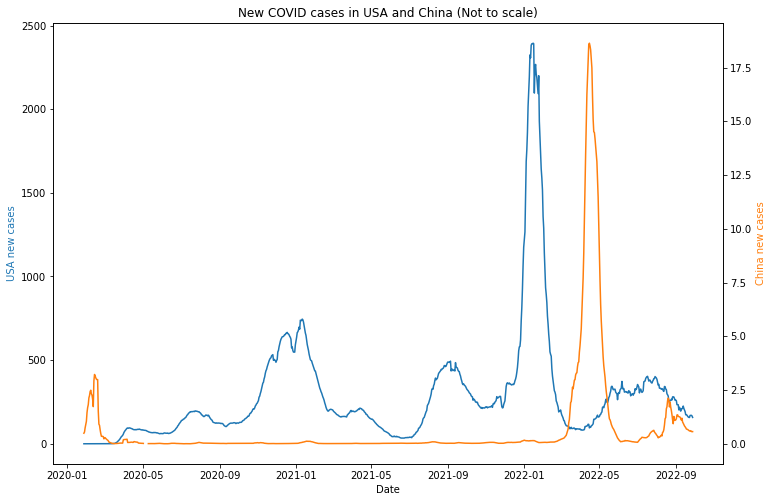

In [ ]:
fig, ax = plt.subplots(1,1) 
ax2=ax.twinx()
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New COVID cases in USA and China (Not to scale)")
#ax.set_xticklabels(afg_df["datetime"])
ax.plot(usa_df["datetime"],usa_df["new_cases_smoothed_per_million"])
ax2.plot(china_df["datetime"],china_df["new_cases_smoothed_per_million"], color="tab:orange")
ax.set_ylabel("USA new cases", color="tab:blue")
ax2.set_ylabel("China new cases", color="tab:orange")
ax.set_xlabel("Date")
plt.show()

This plots new cases in the US vs China. The scales are not the same to help the visualization. China does not have the hump in late 2020/early 2021 that the US has. And it is interesting that China has a hump in mid 2022, closely following the US's hump in early 2022. 

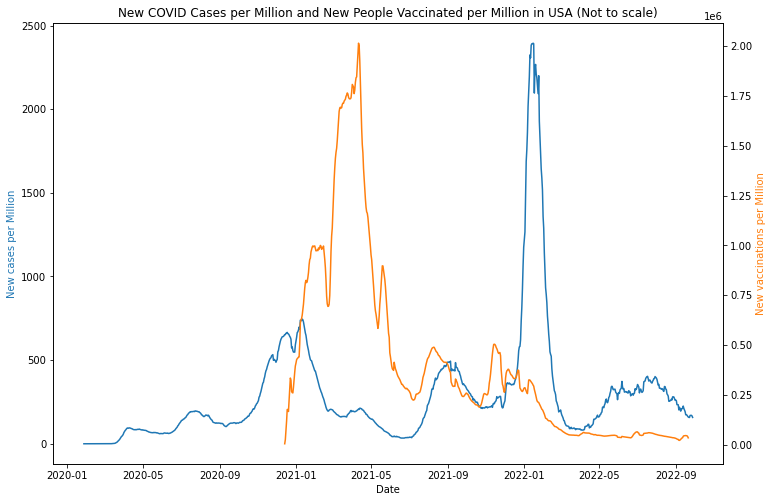

In [ ]:
fig, ax = plt.subplots(1,1) 
ax2=ax.twinx()
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New COVID Cases per Million and New People Vaccinated per Million in USA (Not to scale)")
#ax.set_xticklabels(afg_df["datetime"])
ax.plot(usa_df["datetime"],usa_df["new_cases_smoothed_per_million"])
ax2.plot(usa_df["datetime"],usa_df["new_people_vaccinated_smoothed"], color="tab:orange")
ax.set_ylabel("New cases per Million", color="tab:blue")
ax2.set_ylabel("New vaccinations per Million", color="tab:orange")
ax.set_xlabel("Date")
plt.show()

This plot shows new cases compared to new people vaccinated in the US. It is not to scale to help the visualization. You can see how after the vaccine is developed, the number of cases goes down. However, eventually the number of cases increases again as the number of people getting vaccinated goes down.

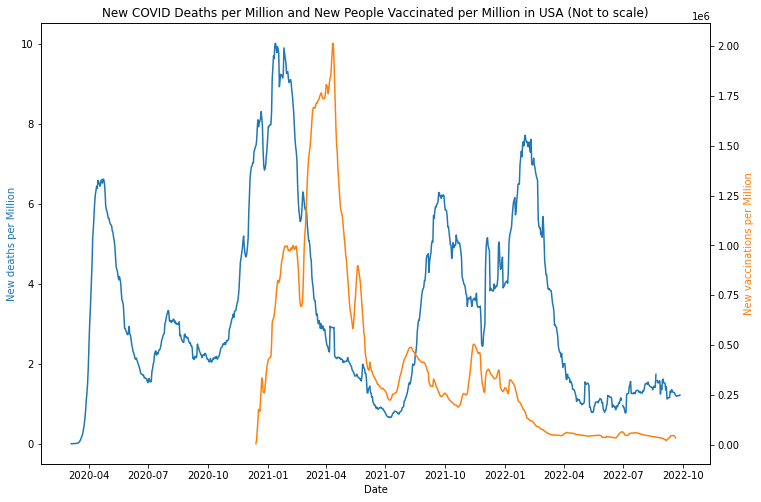

In [ ]:
fig, ax = plt.subplots(1,1) 
ax2=ax.twinx()
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New COVID Deaths per Million and New People Vaccinated per Million in USA (Not to scale)")
#ax.set_xticklabels(afg_df["datetime"])
ax.plot(usa_df["datetime"],usa_df["new_deaths_smoothed_per_million"])
ax2.plot(usa_df["datetime"],usa_df["new_people_vaccinated_smoothed"], color="tab:orange")
ax.set_ylabel("New deaths per Million", color="tab:blue")
ax2.set_ylabel("New vaccinations per Million", color="tab:orange")
ax.set_xlabel("Date")
plt.show()

This plot shows new deaths compared to new people vaccinated in the US. It is not to scale to help the visualization. Similar to new cases, deaths decreases after the vaccine is developed, but eventually the number of deaths increases again. 

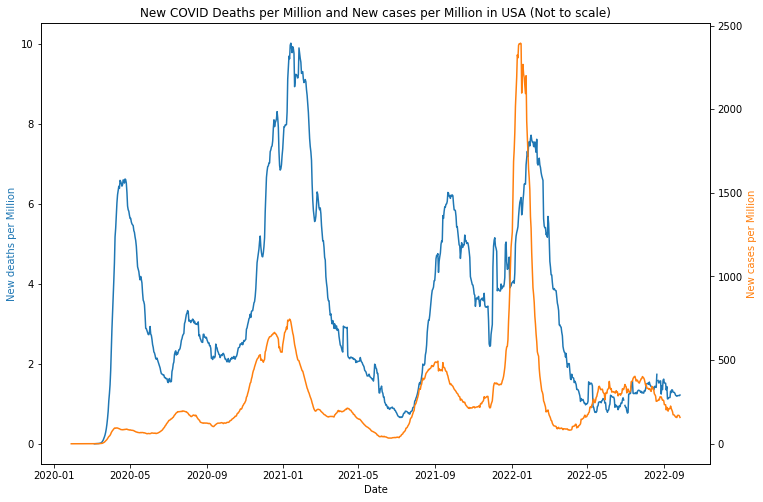

In [ ]:
fig, ax = plt.subplots(1,1) 
ax2=ax.twinx()
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(usa_df["datetime"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.gcf().autofmt_xdate()
plt.title("New COVID Deaths per Million and New cases per Million in USA (Not to scale)")
#ax.set_xticklabels(afg_df["datetime"])
ax.plot(usa_df["datetime"],usa_df["new_deaths_smoothed_per_million"])
ax2.plot(usa_df["datetime"],usa_df["new_cases_smoothed_per_million"], color="tab:orange")
ax.set_ylabel("New deaths per Million", color="tab:blue")
ax2.set_ylabel("New cases per Million", color="tab:orange")
ax.set_xlabel("Date")
plt.show()

This plot shows new cases vs new deaths. It is interesting how very early in the pandemic, deaths were increasing much faster than cases. 

In [ ]:
population_density_location = []
median_age_location = []
aged_65_older_location = []
life_expectancy_location = []
human_development_index_location = []

for location in locations_arr:
  loc_df = full_df.loc[full_df["location"] == location]
  population_density_mean = loc_df["population_density"].mean()
  median_age_mean = loc_df["median_age"].mean()
  aged_65_older_mean = loc_df["aged_65_older"].mean()
  life_expectancy_mean = loc_df["life_expectancy"].mean()
  human_development_index_mean = loc_df["human_development_index"].mean()

  population_density_location.append(population_density_mean)
  median_age_location.append(median_age_mean)
  aged_65_older_location.append(aged_65_older_mean)
  life_expectancy_location.append(life_expectancy_mean)
  human_development_index_location.append(human_development_index_mean)
  

deaths_metrics_df = pd.DataFrame()
deaths_metrics_df["locations"] = locations_arr
deaths_metrics_df["total_deaths_per_mill"] = total_deaths_per_mill_per_location

deaths_metrics_df["population_density_location"] = population_density_location
deaths_metrics_df["median_age_location"] = median_age_location
deaths_metrics_df["aged_65_older_location"] = aged_65_older_location
deaths_metrics_df["life_expectancy_location"] = life_expectancy_location
deaths_metrics_df["human_development_index_location"] = human_development_index_location
deaths_metrics_df = deaths_metrics_df.set_index("locations")

deaths_metrics_df_country = deaths_metrics_df.drop(index="World")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="Asia")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="Upper middle income")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="Lower middle income")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="High income")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="Europe")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="North America")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="South America")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="European Union")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="Africa")
deaths_metrics_df_country = deaths_metrics_df_country.drop(index="Low income")

Below are some boxplots for the above metrics: median age, share of population aged 65 and older, life expectancy, and human development index. Seeing the range of these values will help us determine the usefulness of the comparisons we make later on. 

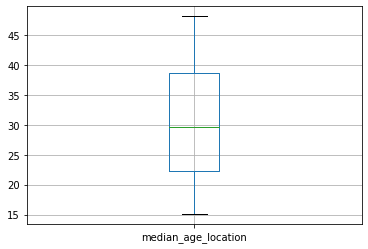

In [ ]:
deaths_metrics_df_country.boxplot(column = "median_age_location")

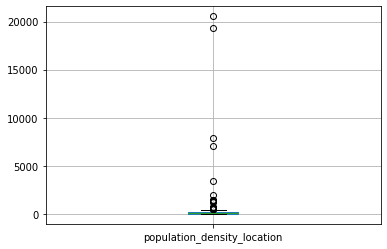

In [ ]:
deaths_metrics_df_country.boxplot(column = "population_density_location")

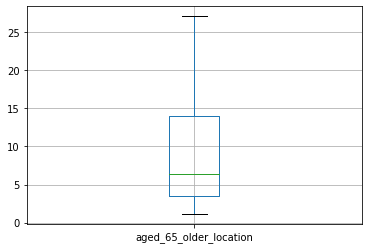

In [ ]:
deaths_metrics_df_country.boxplot(column = "aged_65_older_location")

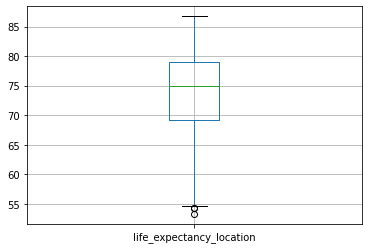

In [ ]:
deaths_metrics_df_country.boxplot(column = "life_expectancy_location")

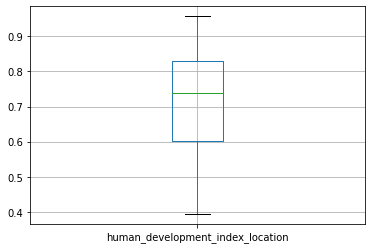

In [ ]:
deaths_metrics_df_country.boxplot(column = "human_development_index_location")

In [ ]:
# display first few rows of new dataframe
deaths_metrics_df_country.head(10)

,total_deaths_per_mill,population_density_location,median_age_location,aged_65_older_location,life_expectancy_location,human_development_index_location
locations,,,,,,
Afghanistan,194.466,54.422,18.6,2.581,64.83,0.511
Albania,1257.221,104.871,38.0,13.188,78.57,0.795
Algeria,155.711,17.348,29.1,6.211,76.88,0.748
Andorra,1961.181,163.755,NaN,NaN,83.73,0.868
Angola,55.559,23.890,16.8,2.405,61.15,0.581
Anguilla,761.760,NaN,NaN,NaN,81.88,NaN
Antigua and Barbuda,1566.188,231.845,32.1,6.933,77.02,0.778
Argentina,2868.954,16.177,31.9,11.198,76.67,0.845
Armenia,3111.100,102.931,35.7,11.232,75.09,0.776


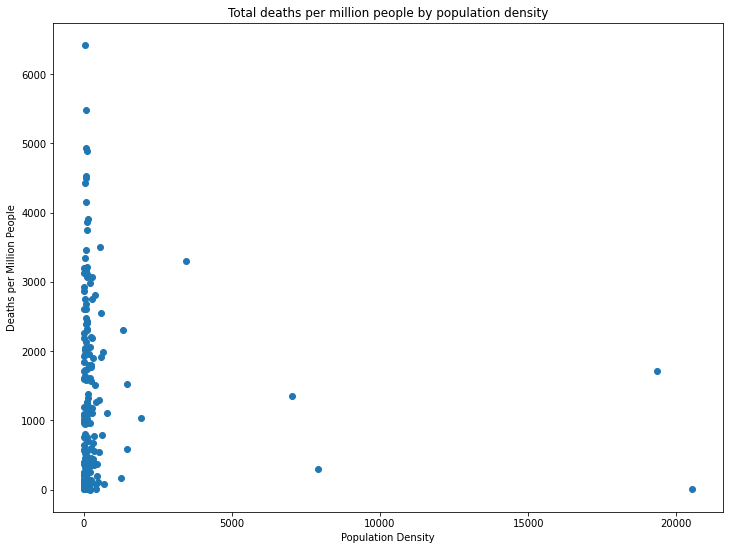

In [ ]:
# graphs population density against the total deaths per million people of a country
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.xlabel("Population Density")
plt.ylabel("Deaths per Million People")
plt.scatter(deaths_metrics_df_country["population_density_location"], deaths_metrics_df_country["total_deaths_per_mill"], )
plt.title("Total deaths per million people by population density")
plt.show()

The objective to this graph was to see the possible connection between a country's population density and their total deaths per capita. The reasoning behind this comparison is that more dense populations may find it more difficult to socially distance and may have led to more deaths. Due to the outliers, the graph for this metric doesn't provide us with clear conclusions.



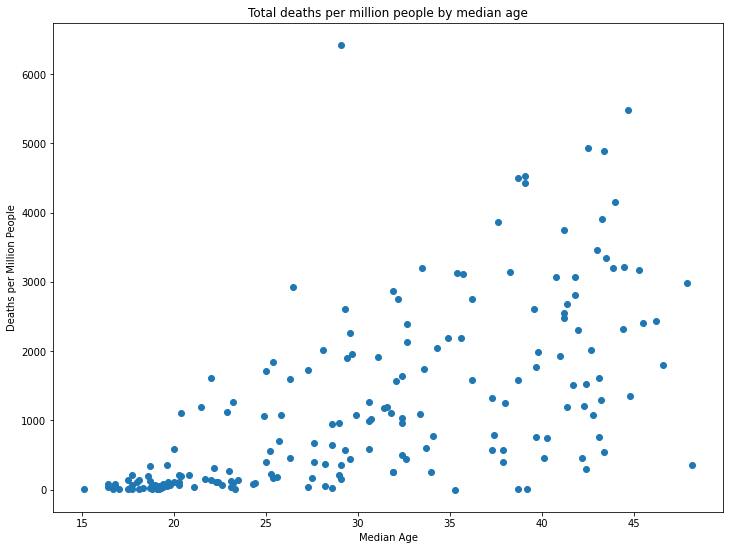

In [ ]:
# graphs median age against the total deaths per million people of a country
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.ylabel("Deaths per Million People")
plt.xlabel("Median Age")
plt.scatter(deaths_metrics_df_country["median_age_location"], deaths_metrics_df_country["total_deaths_per_mill"])
plt.title("Total deaths per million people by median age")
plt.show()

This is a scatter plot that compares a country's median age against their total deaths per million people. The reasoning behind this comparison is the general understanding of COVID as more dangerous for elderly populations, which may suggest that countries with higher rates of elderly populations may have greater deaths. We can see that this graph supports that to some extent especially with the cluster of countries at the bottom left of the graph with a low number of cases and a low number of total deaths. However, this trend doesn't seem to be too strong, for other countries, likely because many countries with younger populations are those from developing nations with less established health infrastructures and access to vaccines.  

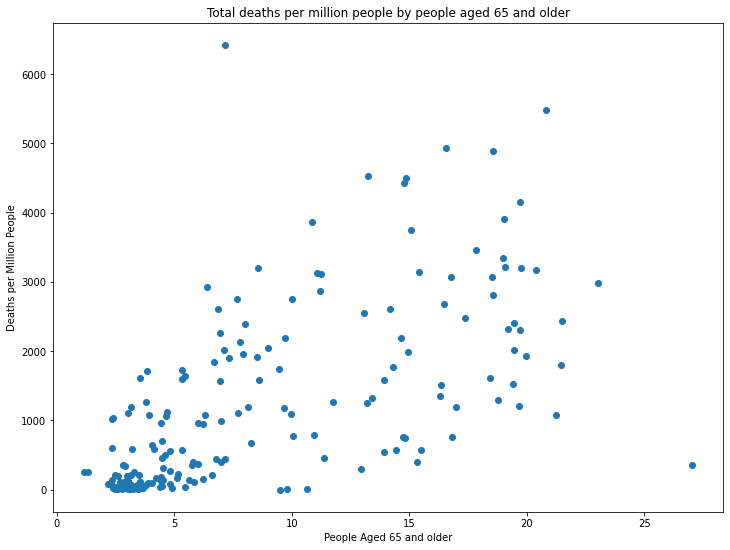

In [ ]:
# graphs # of people age 65 and above against the total deaths per million people of a country
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.ylabel("Deaths per Million People")
plt.xlabel("People Aged 65 and older")
plt.scatter(deaths_metrics_df_country["aged_65_older_location"], deaths_metrics_df_country["total_deaths_per_mill"])
plt.title("Total deaths per million people by people aged 65 and older")
plt.show()

This is a scatter plot that compares a country's percentage of the population who are age 65 and older against their total deaths per million people. The reasoning behind this comparison is the general understanding of COVID as more dangerous for elderly populations, which may suggest that countries with higher rates of elderly populations may have greater deaths. We can see that this graph supports that to some extent especially with the cluster of countries at the bottom left of the graph with a low number of cases and a low number of total deaths. However, this trend doesn't seem to be too strong, for other countries, likely because many countries with younger populations are those from developing nations with less established health infrastructures and access to vaccines.  

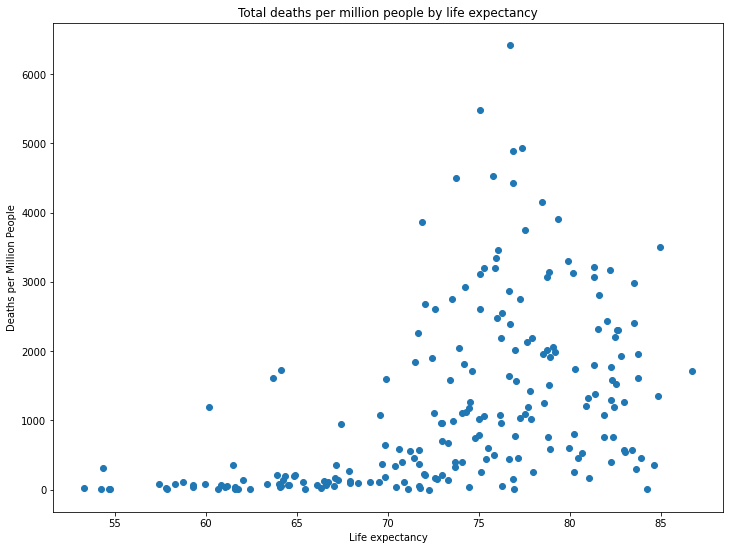

In [ ]:
# graphs life expectancy against the total deaths per million people of a country
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.ylabel("Deaths per Million People")
plt.xlabel("Life expectancy")
plt.scatter(deaths_metrics_df_country["life_expectancy_location"], deaths_metrics_df_country["total_deaths_per_mill"])
plt.title("Total deaths per million people by life expectancy")
plt.show()

The above graph compares total deaths per million again but against the country's life expectancy. We can reasonably assume that a higher life expectancy is indicative of a strong healthcare system that is capable and wealthy enough to care for an aging population. As we can see in the graph, there doesn't seem to be too strong of a connection, with many countries with love life expectancies having some of the least deaths. 

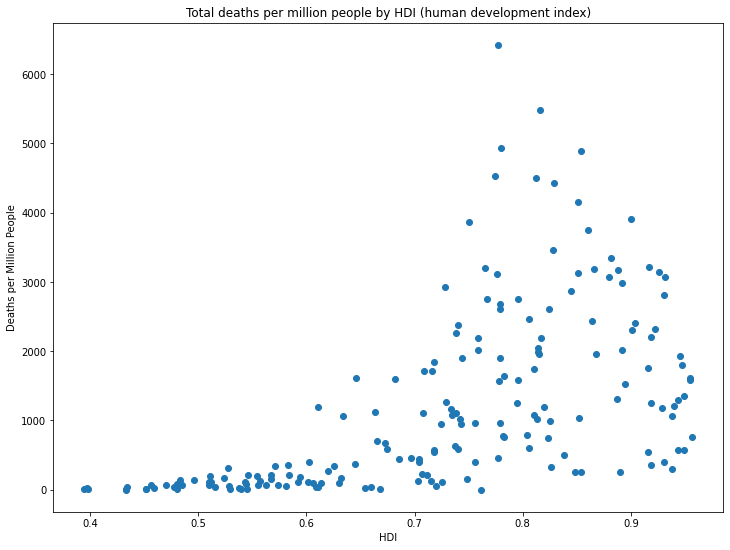

In [ ]:
# graphs human development against against the total deaths per million people of a country
fig, ax = plt.subplots(1,1) 
fig.set_figheight(9)
fig.set_figwidth(12)
plt.ylabel("Deaths per Million People")
plt.xlabel("HDI")
plt.scatter(deaths_metrics_df_country["human_development_index_location"], deaths_metrics_df_country["total_deaths_per_mill"])
plt.title("Total deaths per million people by HDI (human development index)")
plt.show()

The above graph compares total deaths per million again but against the human development index. The [human development index](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI) is "summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living". In this sense, it seems to be related to the life expectancy metric above, which is supported by the similarities in the two graphs.